C:\Users\quoct\AppData\Local\Temp\ipykernel_81508\752270324.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df["aX"], "g.", label="x", linestyle="solid", marker=",")
C:\Users\quoct\AppData\Local\Temp\ipykernel_81508\752270324.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df["aY"], "b.", label="y", linestyle="solid", marker=",")
C:\Users\quoct\AppData\Local\Temp\ipykernel_81508\752270324.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df["aZ"], "r.", label="z", linestyle="solid", marker=",")


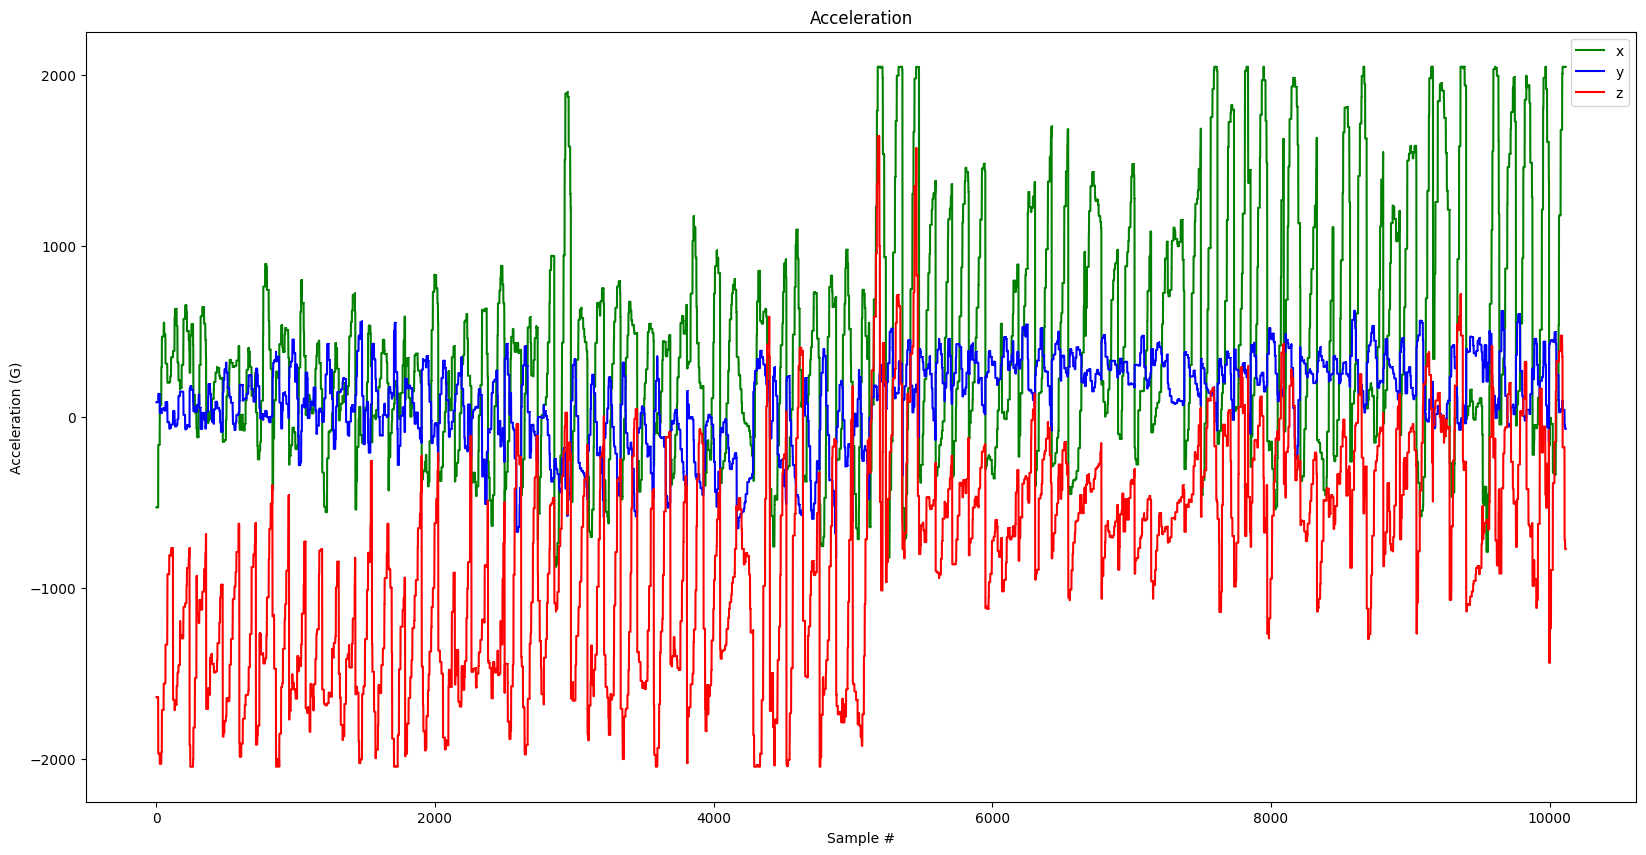

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "flex.csv"

df = pd.read_csv("../new 19/" + filename)
# print(df.dtypes)

index = range(1, len(df["aX"]) + 1)

plt.rcParams["figure.figsize"] = (20, 10)

plt.plot(index, df["aX"], "g.", label="x", linestyle="solid", marker=",")
plt.plot(index, df["aY"], "b.", label="y", linestyle="solid", marker=",")
plt.plot(index, df["aZ"], "r.", label="z", linestyle="solid", marker=",")
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

In [4]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures
GESTURES = [
    "volunteer",
    "flex",
]
NUM_GESTURES = len(GESTURES)
TOTAL_RECORDS_PER_BATCH = 119

# create a one-hot encoded output matrix that is encoded to value 0 or 1
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
    # get the current gesture (ex: punch or flex)
    gesture = GESTURES[gesture_index]
    print(f"Processing index {gesture_index} for gesture '{gesture}'.")

    # assign output to the corresponding input index (the output will be encoded to 0 or 1)
    output = ONE_HOT_ENCODED_GESTURES[gesture_index]

    # read input from csv file
    df = pd.read_csv("../new 19/" + gesture + ".csv")
    print(df.head())
    print(df.shape)
    print(df.shape[0], " -- ", TOTAL_RECORDS_PER_BATCH)

    # partition input to multiple batches --> reason: faster execution
    num_batches_per_gesture = int(df.shape[0] / TOTAL_RECORDS_PER_BATCH)

    print(f"\tThere are {num_batches_per_gesture} batches of the *{gesture}* gesture.\n")

    # go into each batch and start processing
    for batch in range(num_batches_per_gesture):
        tensor = []
        for record in range(TOTAL_RECORDS_PER_BATCH):
            index = batch * TOTAL_RECORDS_PER_BATCH + record
            # normalize the input data, between 0 to 1:
            # - acceleration is between: -2048 to +2048
            tensor += [
                (df["aX"][index] + 2048.0) / 4096.0,
                (df["aY"][index] + 2048.0) / 4096.0,
                (df["aZ"][index] + 2048.0) / 4096.0,
            ]
        inputs.append(tensor)
        outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")
print(len(inputs), "\n")
print(
    "punch records length per batch = len([ax,ay,az]) * TOTAL_RECORDS_PER_BATCH = 3 * TOTAL_RECORDS_PER_BATCH = ",
    len(inputs[0]),
    "\n",
)
print("punch input: ", inputs[0], " output: ", outputs[0])
print("flex input: ", inputs[1], " output: ", outputs[1])

TensorFlow version = 2.15.0

Processing index 0 for gesture 'volunteer'.
    aX   aY   aZ
0 -243 -311 -487
1 -243 -311 -487
2 -243 -311 -487
3 -243 -311 -487
4 -208 -368 -503
(10115, 3)
10115  --  119
	There are 85 batches of the *volunteer* gesture.

Processing index 1 for gesture 'flex'.
    aX  aY    aZ
0 -531  84 -1642
1 -531  84 -1642
2 -531  84 -1642
3 -531  84 -1642
4 -531  84 -1642
(10115, 3)
10115  --  119
	There are 85 batches of the *flex* gesture.

Data set parsing and preparation complete.
170 

punch records length per batch = len([ax,ay,az]) * TOTAL_RECORDS_PER_BATCH = 3 * TOTAL_RECORDS_PER_BATCH =  357 

punch input:  [0.44067383 0.42407227 0.38110352 0.44067383 0.42407227 0.38110352
 0.44067383 0.42407227 0.38110352 0.44067383 0.42407227 0.38110352
 0.44921875 0.41015625 0.37719727 0.44921875 0.41015625 0.37719727
 0.44921875 0.41015625 0.37719727 0.44921875 0.41015625 0.37719727
 0.44921875 0.41015625 0.37719727 0.44921875 0.41015625 0.37719727
 0.44921875 0.41015625 

In [5]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_val = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_val = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print(inputs_train.shape, outputs_train.shape)
print(inputs_test.shape, outputs_test.shape)
print(inputs_val.shape, outputs_val.shape)

print("Data set randomization and splitting complete.")

(102, 357) (102, 2)
(34, 357) (34, 2)
(34, 357) (34, 2)
Data set randomization and splitting complete.


In [6]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation="softplus", input_shape=(357,)))  # relu is used for performance
model.add(keras.layers.Dense(15, activation="softplus"))
model.add(keras.layers.Dense(NUM_GESTURES, activation="softmax"))  # softmax is used, because we only expect one gesture to occur per input

model.layers

In [14]:
# Train Model
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

print(inputs_train[0].shape, inputs_train.shape)

history = model.fit(
    inputs_train,
    outputs_train,
    epochs=300,
    batch_size=1,
    validation_data=(inputs_val, outputs_val),
)

(357,) (102, 357)
Epoch 1/300
102/102 [==============================] - 1s 3ms/step - loss: 3.7996e-08 - mae: 5.3290e-05 - val_loss: 0.0588 - val_mae: 0.0595
Epoch 2/300
102/102 [==============================] - 0s 2ms/step - loss: 3.7826e-08 - mae: 5.3262e-05 - val_loss: 0.0588 - val_mae: 0.0595
Epoch 3/300
102/102 [==============================] - 0s 1ms/step - loss: 3.7847e-08 - mae: 5.3191e-05 - val_loss: 0.0588 - val_mae: 0.0595
Epoch 4/300
102/102 [==============================] - 0s 2ms/step - loss: 3.7765e-08 - mae: 5.3077e-05 - val_loss: 0.0588 - val_mae: 0.0595
Epoch 5/300
102/102 [==============================] - 0s 2ms/step - loss: 3.7685e-08 - mae: 5.3105e-05 - val_loss: 0.0588 - val_mae: 0.0595
Epoch 6/300
102/102 [==============================] - 0s 2ms/step - loss: 3.7627e-08 - mae: 5.3022e-05 - val_loss: 0.0588 - val_mae: 0.0595
Epoch 7/300
102/102 [==============================] - 0s 1ms/step - loss: 3.7539e-08 - mae: 5.3124e-05 - val_loss: 0.0588 - val_mae: 0.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                17900     
                                                                 
 dense_1 (Dense)             (None, 15)                765       
                                                                 
 dense_2 (Dense)             (None, 2)                 32        
                                                                 
Total params: 18697 (73.04 KB)
Trainable params: 18697 (73.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# use the model to predict the test inputs
print(inputs_test[0].shape)
predictions = model.predict(inputs_test)
# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)
print(
    len(inputs_train),
    " ",
    len(inputs_test),
    " ",
    len(inputs_val),
    " ",
    len(predictions),
)


# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(outputs_test, axis=1)

# Compare predictions with actual labels
correct_predictions = np.sum(predicted_labels == actual_labels)
total_predictions = len(actual_labels)

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)

(357,)
2/2 [==============================] - 0s 5ms/step
predictions =
 [[1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.605 0.395]
 [0.484 0.516]
 [1.    0.   ]
 [0.996 0.004]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.998 0.002]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]]
actual =
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
102   34   34   34
Accuracy: 0.9411764705882353


In [17]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_dataset
# # converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
# converter.inference_input_type = tf.int8  # or tf.uint8
# converter.inference_output_type = tf.int8  # or tf.uint8
# converter.inference_input_type = tf.float32  # or tf.uint8
# converter.inference_output_type = tf.float32  # or tf.uint8
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os

basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: C:\Users\quoct\AppData\Local\Temp\tmploedpj8m\assets


INFO:tensorflow:Assets written to: C:\Users\quoct\AppData\Local\Temp\tmploedpj8m\assets


Model is 77828 bytes


In [18]:
# Get Interpreter to execute model
interpreter = tf.lite.Interpreter(model_path="gesture_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# print(f"input_details: {input_details}")
# print(f"output_details: {output_details}")

input_data = inputs_test[0:1].astype(np.float32)

print(input_data)
# push input data to interpreter
interpreter.set_tensor(input_details[0]["index"], input_data)

# start execution
interpreter.invoke()

# get the output of this model
output_data = interpreter.get_tensor(output_details[0]["index"])

print(output_data)
# print(output_data.shape)

[[0.61035156 0.5422363  0.12573242 0.61035156 0.5422363  0.12573242
  0.61035156 0.5422363  0.12573242 0.61035156 0.5422363  0.12573242
  0.61035156 0.5422363  0.12573242 0.61035156 0.5422363  0.12573242
  0.5983887  0.54541016 0.14501953 0.5983887  0.54541016 0.14501953
  0.5983887  0.54541016 0.14501953 0.5983887  0.54541016 0.14501953
  0.5983887  0.54541016 0.14501953 0.5983887  0.54541016 0.14501953
  0.5983887  0.54541016 0.14501953 0.5769043  0.56274414 0.14404297
  0.5769043  0.56274414 0.14404297 0.5769043  0.56274414 0.14404297
  0.5769043  0.56274414 0.14404297 0.5769043  0.56274414 0.14404297
  0.5769043  0.56274414 0.14404297 0.5769043  0.56274414 0.14404297
  0.5769043  0.56274414 0.14404297 0.5769043  0.56274414 0.14404297
  0.5769043  0.56274414 0.14404297 0.5769043  0.56274414 0.14404297
  0.5769043  0.56274414 0.14404297 0.64697266 0.5402832  0.13867188
  0.64697266 0.5402832  0.13867188 0.7067871  0.52612305 0.12890625
  0.7067871  0.52612305 0.12890625 0.7067871  0.

In [17]:
def convert_tflite_to_header(tflite_path, output_header_path):
    with open(tflite_path, "rb") as tflite_file:
        tflite_content = tflite_file.read()

    hex_lines = [
        ", ".join([f"0x{byte:02x}" for byte in tflite_content[i : i + 12]])
        for i in range(0, len(tflite_content), 12)
    ]

    hex_array = ",\n  ".join(hex_lines)

    with open(output_header_path, "w") as header_file:
        header_file.write("alignas(8) const unsigned char model[] = {\n  ")
        header_file.write(f"{hex_array}\n")
        header_file.write("};\n\n")


tflite_path = "gesture_model.tflite"
output_header_path = "../include/model(new).h"

convert_tflite_to_header(tflite_path, output_header_path)

In [20]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += "#ifndef " + var_name.upper() + "_H\n"
    c_str += "#define " + var_name.upper() + "_H\n\n"

    # Add array length at top of file
    c_str += "\nunsigned int " + var_name + "_len = " + str(len(hex_data)) + ";\n"

    # Declare C variable
    c_str += "alignas(8) const unsigned char " + var_name + "[] = {"
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, "#04x")
        # hex_str = val
        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ","
        if (i + 1) % 12 == 0:
            hex_str += "\n "
        hex_array.append(hex_str)

    # Add closing brace
    c_str += "\n " + format(" ".join(hex_array)) + "\n};\n\n"

    # Close out header guard
    c_str += "#endif //" + var_name.upper() + "_H"

    return c_str


# c_model_name = "g_model"
c_model_name = "model"
with open(c_model_name + "(new).h", "w") as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("../include/g_model.h")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

OSError: Unable to synchronously open file (file signature not found)